# Predicting Inpatient Length of Stay

Patient length of stay is a critical indicator of the efficiency of hospital management. Hospitals have limited resources, requiring efficient use of beds and clinician time.

The ability to predict how long a patient will stay, only with information available as soon as they enter the hospital and are diagnosed, can therefore have many positive effects for a hospital and its efficiency. 

A model that can predict patient length of stay could allow hospitals to better analyze the factors that influence length of stay the most. Such analysis could pave the path for reductions in the length of inpatient stay, which could, in turn, have the effect of decreased risk of infection and medication side effects, improvement in the quality of treatment, and increased hospital profit with more efficient bed management.

Furthermore, predicting patient’s length of stay also greatly benefits the patients and patient’s families as they can have an idea of how long they can expect to stay upon being admitted.

The goal of this assignment is to create a model that can predict length of stay and the charges for patients upon admission to a hospital. The dataset come from https://healthdata.gov/dataset/hospital-inpatient-discharges-sparcs-de-identified-2015.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-dataset" data-toc-modified-id="Load-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load dataset</a></span></li><li><span><a href="#Preprocess-dataset" data-toc-modified-id="Preprocess-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocess dataset</a></span></li><li><span><a href="#Find-best-model" data-toc-modified-id="Find-best-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Find best model</a></span></li><li><span><a href="#Fit-best-model" data-toc-modified-id="Fit-best-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Fit best model</a></span></li></ul></div>

## Load dataset

Dataset description:
* Health Service Area: Type is Char. Length is 15. A description of the Health Service Area (HSA) in which the hospital is located. Blank for abortion records. Capital/Adirondack, Central NY, Finger Lakes, Hudson Valley, Long Island, New York City, Southern Tier, Western NY.
* Hospital County: Type is Char. Length is 11. A description of the county in which the hospital is located. Blank for abortion records.
* Operating Certificate Number: Type is Char. Length is 8. The facility Operating Certificate Number as assigned by NYS Department of Health. Blank for abortion records.
* Facility Id: Type is Num. Length is 6. Permanent Facility Identifier. Blank for abortion records.
* Facility Name: Type is Char. Length is 70. The name of the facility where services were performed based on the Permanent Facility Identifier (PFI), as maintained by the NYSDOH Division of Health Facility Planning. For abortion records ‘Abortion Record – Facility Name Redacted’ appears.
* Age Group: Type is Char. Length is 11. Age in years at time of discharge. Grouped into the following age groups: 0 to 17, 18 to 29, 30 to 49, 50 to 69, and 70 or Older.
* Zip Code - 3 digits: Type is Char. Length is 3. The first three digits of the patient's zip code. Blank for: - population size less than 20,000 - abortion records, or - cell size less than 10 on population classification strata. “OOS” are Out of State zip codes.
* Gender: Type is Char. Length is 1. Patient gender: (M) Male, (F) Female, (U) Unknown.
* Race: Type is Char. Length is 32. Patient race. Black/African American, Multi, Other Race, Unknown, White. Other Race includes Native Americans and Asian/Pacific Islander.
* Ethnicity: Type is Char. Length is 20. Patient ethnicity. The ethnicity of the patient: Spanish/Hispanic Origin, Not of Spanish/Hispanic Origin, Multi, Unknown.
* Length of Stay: Type is Char. Length is 5. The total number of patient days at an acute level and/or other than acute care level (excluding leave of absence days) (Discharge Date - Admission Date) + 1. Length of Stay greater than or equal to 120 days has been aggregated to 120+ days.
* Type of Admission: Type is Char. Length is 15. A description of the manner in which the patient was admitted to the health care facility: Elective, Emergency, Newborn, Not Available, Trauma, Urgent.
* Patient Disposition: Type is Char. Length is 37. The patient's destination or status upon discharge.
* Discharge Year: Type is Char. Length is 4. The year (CCYY) of discharge.
* CCS Diagnosis Code: Type is Char. Length is 3. AHRQ Clinical Classification Software (CCS) Diagnosis Category Code. More information on the CCS system may be found at the direct link: http://www.hcup-us.ahrq.gov/toolssoftware/ccs/ccs.jsp
* CCS Diagnosis Description: Type is Char. Length is 450. AHRQ Clinical Classification Software (CCS) Diagnosis Category Description. More information on the CCS system may be found at the direct link: http://www.hcup-us.ahrq.gov/toolssoftware/ccs/ccs.jsp
* CCS Procedure Code: Type is Char. Length is 3. AHRQ Clinical Classification Software (CCS) ICD-9 Procedure Category Code. More information on the CCS system may be found at the direct link: http://www.hcup-us.ahrq.gov/toolssoftware/ccs/ccs.jsp
* CCS Procedure Description: Type is Char. Length is 450. AHRQ Clinical Classification Software (CCS) ICD-9 Procedure Category Description. More information on the CCS system may be found at the direct link: http://www.hcup-us.ahrq.gov/toolssoftware/ccs/ccs.jsp
* APR DRG Code: Type is Char. Length is 3. The APR-DRG Classification Code
* APR DRG Description: Type is Char. Length is 89. The APR-DRG Classification Code Description In Calendar Year 2011, Version 28 of the APR-DRG Grouper. http://www.health.ny.gov/statistics/sparcs/sysdoc/appy.htm
* APR MDC Code: Type is Char. Length is 2. All Patient Refined Major Diagnostic Category (APR MDC) Code. APR-DRG Codes 001-006 and 950-956 may group to more than one MDC Code. All other APR DRGs group to one MDC category.
* APR MDC Description: Type is Char. Length is 200. All Patient Refined Major Diagnostic Category (APR MDC) Description.
* APR Severity of Illness Code: Type is Char. Length is 1. The APR-DRG Severity of Illness Code: 1, 2, 3, 4
* APR Severity of Illness Description: Type is Char. Length is 8. All Patient Refined Severity of Illness (APR SOI) Description. Minor (1), Moderate (2), Major (3) , Extreme (4).
* APR Risk of Mortality: Type is Char. Length is 8. All Patient Refined Risk of Mortality (APR ROM). Minor (1), Moderate (2), Major (3) , Extreme (4).
* APR Medical Surgical Description: Type is Char. Length is 14. The APR-DRG specific classification of Medical, Surgical or Not Applicable.
* Payment Typology 1: Type is Char. Length is 25. A description of the type of payment for this occurrence.
* Payment Typology 2: Type is Char. Length is 25. A description of the type of payment for this occurrence.
* Payment Typology 3: Type is Char. Length is 25. A description of the type of payment for this occurrence.
* Birth Weight: Type is Char. Length is 4. The neonate birth weight in grams; rounded to nearest 100g.
* Abortion Edit Indicator: Type is Char. Length is 1. A flag to indicate if the discharge record contains any indication of abortion ("N" = No; "Y" = Yes).
* Emergency Department Indicator= Type is Char. Length is 1. The Emergency Department Indicator is set based on the submitted revenue codes. If the record contained an Emergency Department revenue code of 045X, the indicator is set to "Y", otherwise it will be “N”.
* Total Charges: Total charges for the discharge.
* Total Costs: Total estimated costs for the discharge.

In [2]:
import pandas as pd

df = pd.read_csv('http://www.i3s.unice.fr/~riveill/dataset/Hospital_Inpatient_Discharges_De-Identified_2015.csv', sep=",", nrows=2000)
df.head()

,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCS Diagnosis Code,CCS Diagnosis Description,CCS Procedure Code,CCS Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,4,Urgent,Home or Self Care,2015,122,Pneumonia (except that caused by tuberculosis ...,0,NO PROC,139,Other pneumonia,4,Diseases and Disorders of the Respiratory System,2,Moderate,Minor,Medical,Medicare,Private Health Insurance,NaN,0,N,Y,5333.90,4818.42
1,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,4,Elective,Hosp Basd Medicare Approved Swing Bed,2015,55,Fluid and electrolyte disorders,0,NO PROC,422,Hypovolemia & related electrolyte disorders,10,"Endocrine, Nutritional and Metabolic Diseases ...",2,Moderate,Moderate,Medical,Medicare,NaN,NaN,0,N,Y,4865.99,4588.78
2,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,4,Urgent,Home or Self Care,2015,122,Pneumonia (except that caused by tuberculosis ...,202,ELECTROCARDIOGRAM,139,Other pneumonia,4,Diseases and Disorders of the Respiratory System,1,Minor,Minor,Medical,Medicare,Private Health Insurance,NaN,0,N,Y,5901.54,5559.56
3,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,50 to 69,147,F,White,Not Span/Hispanic,2,Elective,Home or Self Care,2015,55,Fluid and electrolyte disorders,0,NO PROC,249,"Other gastroenteritis, nausa & vomiting",6,Diseases and Disorders of the Digestive System,2,Moderate,Minor,Medical,Medicare,NaN,NaN,0,N,Y,3619.08,3567.25
4,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,M,White,Not Span/Hispanic,2,Elective,Home or Self Care,2015,122,Pneumonia (except that caused by tuberculosis ...,0,NO PROC,139,Other pneumonia,4,Diseases and Disorders of the Respiratory System,1,Minor,Moderate,Medical,Medicare,Blue Cross/Blue Shield,Private Health Insurance,0,N,Y,3185.87,3167.89


In [3]:
''' Select only some columns '''
from sklearn.model_selection import train_test_split

selected_features = ["Facility Name", "Age Group", "Emergency Department Indicator"]
variable_to_predict = ["Length of Stay", "Total Charges"]

X_train, X_test, y_train, y_test = train_test_split(df[selected_features], df[variable_to_predict], test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape)

(1600, 3) (400, 3)


In [4]:
y_train["Length of Stay"]

0       4
816     2
790     2
361     3
592     2
       ..
1791    2
1096    2
1932    1
235     4
1061    8
Name: Length of Stay, Length: 1600, dtype: int64

## Preprocess dataset

In [5]:
''' Check for missing value '''
def missing_value(df, txt):
    if df.isna().any().any():
        print("Replace missing value on %s" % txt)
    else:
        print("There is no missing value on %s" % txt)
        
missing_value(X_train, "train")
missing_value(X_test, "test")

There is no missing value on train
There is no missing value on test


In [6]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np 

total_x = np.concatenate((X_train, X_test))

ohe = OneHotEncoder(sparse=False)
temp_x = ohe.fit_transform(total_x)

X_train = temp_x[:len(X_train)]
X_test = temp_x[len(X_train):]

In [7]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1600, 12) (400, 12) (1600, 2) (400, 2)


In [12]:
y_train = y_train["Length of Stay"]
y_test = y_test["Length of Stay"]

y_train = y_train["Length of Stay"]
y_test =y_test["Length of Stay"]

## Find best model

In [14]:
import tensorflow as tf

def Build_Model(activation, neurons, optimizer, dropout):
    inputs = tf.keras.layers.Input(shape=(X_train.shape[1],1,))
    x = tf.keras.layers.Dense(units=neurons*2, input_shape=(), activation=activation)(inputs)
    x = tf.keras.layers.Dropout(dropout)(x)
    x = tf.keras.layers.Dense(units=neurons, activation=activation)(x)
    x = tf.keras.layers.Dropout(dropout)(x)
    x = tf.keras.layers.Flatten()(x)
    outputs = tf.keras.layers.Dense(units=1, activation='linear')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name='mnist_model')
    model.compile(loss='MSE', optimizer= optimizer, metrics=['mse'])

    return model

In [15]:
# Definying grid parameters
activation = ['relu', 'tanh', 'softmax']
neurons = [8, 16]
dropout = [0.25, 0.5]
optimizer = ['SGD', 'Adam']
batch_size = [25, 50]

param_grid = dict(activation = activation,
                  neurons = neurons,
                  dropout = dropout,
                  batch_size=batch_size,
                  optimizer = optimizer)

In [16]:
from sklearn.model_selection import GridSearchCV

clf = tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn=Build_Model, epochs=50)

model = GridSearchCV(estimator=clf,
                     param_grid=param_grid,
                     n_jobs=-1)

In [17]:
model.fit(X_train,y_train)

print("Min MSE: {}\nusing {}".format(round(model.best_score_,3), model.best_params_))

Epoch 1/50
64/64 [==============================] - 0s 1ms/step - loss: 12.4989 - mse: 12.4989
Epoch 2/50
64/64 [==============================] - 0s 1ms/step - loss: 7.5706 - mse: 7.5706
Epoch 3/50
64/64 [==============================] - 0s 1ms/step - loss: 7.1283 - mse: 7.1283
Epoch 4/50
64/64 [==============================] - 0s 1ms/step - loss: 7.0216 - mse: 7.0216
Epoch 5/50
64/64 [==============================] - 0s 1ms/step - loss: 6.9777 - mse: 6.9777
Epoch 6/50
64/64 [==============================] - 0s 1ms/step - loss: 6.8790 - mse: 6.8790
Epoch 7/50
64/64 [==============================] - 0s 1ms/step - loss: 6.9219 - mse: 6.9219
Epoch 8/50
64/64 [==============================] - 0s 1ms/step - loss: 6.9213 - mse: 6.9213
Epoch 9/50
64/64 [==============================] - 0s 1ms/step - loss: 6.9149 - mse: 6.9149
Epoch 10/50
64/64 [==============================] - 0s 1ms/step - loss: 6.8269 - mse: 6.8269
Epoch 11/50
64/64 [==============================] - 0s 1ms/step - 

## Fit best model

In [18]:
new_model = Build_Model(activation="tanh", neurons=16, optimizer="Adam", dropout=0.25)
new_model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 12, 1)]           0         
_________________________________________________________________
dense_6 (Dense)              (None, 12, 32)            64        
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 32)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 12, 16)            528       
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 16)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 

In [19]:
# simple early stopping
# try with patience 0 and 100
es = tf.keras.callbacks.EarlyStopping(monitor='val_mse', mode='min', patience=5, restore_best_weights=True, verbose=1)
mc = tf.keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_mse', mode='min', save_best_only=True, verbose=1)

# fit model
history = new_model.fit(X_train, y_train, validation_split=0.1, epochs=4000, callbacks=[es, mc], verbose=1)

Epoch 1/4000
37/45 [=======================>......] - ETA: 0s - loss: 16.9111 - mse: 16.9111
Epoch 00001: val_mse improved from inf to 7.01208, saving model to best_model.h5
45/45 [==============================] - 0s 6ms/step - loss: 15.7968 - mse: 15.7968 - val_loss: 7.0121 - val_mse: 7.0121
Epoch 2/4000
35/45 [======================>.......] - ETA: 0s - loss: 8.5721 - mse: 8.5721  
Epoch 00002: val_mse improved from 7.01208 to 5.28400, saving model to best_model.h5
45/45 [==============================] - 0s 2ms/step - loss: 8.4576 - mse: 8.4576 - val_loss: 5.2840 - val_mse: 5.2840
Epoch 3/4000
23/45 [==============>...............] - ETA: 0s - loss: 7.4765 - mse: 7.4765  
Epoch 00003: val_mse improved from 5.28400 to 4.96543, saving model to best_model.h5
45/45 [==============================] - 0s 3ms/step - loss: 7.7789 - mse: 7.7789 - val_loss: 4.9654 - val_mse: 4.9654
Epoch 4/4000
39/45 [=========================>....] - ETA: 0s - loss: 7.8201 - mse: 7.8201
Epoch 00004: val_mse

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


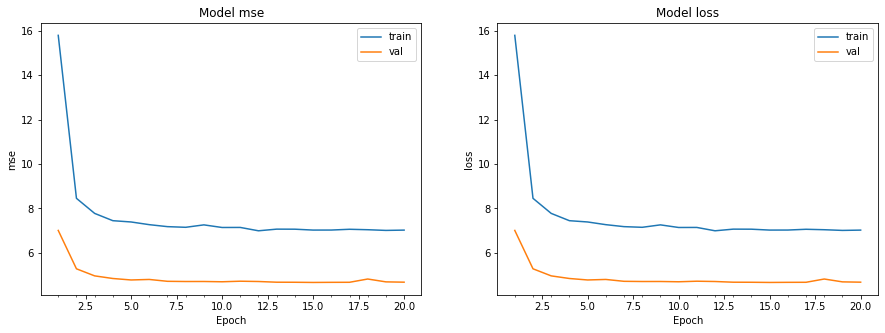

In [23]:
import matplotlib.pyplot as plt

'''
Plot Accuracy or Loss as a Function of Number of Epoch
'''
def plot_model_history(model_history, metrics):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history[metrics])+1),model_history.history['mse'])
    axs[0].plot(range(1,len(model_history.history['val_'+metrics])+1),model_history.history['val_'+metrics])
    txt = ['train', 'val']
    
    axs[0].legend(txt, loc='best')
    axs[0].set_title('Model '+metrics)
    axs[0].set_ylabel(metrics)
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history[metrics])+1),len(model_history.history[metrics])/10)
    
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    
    axs[1].legend(txt, loc='best')
    axs[1].set_title('Model loss')
    axs[1].set_ylabel('loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    
    plt.show()
    
plot_model_history(history, 'mse')